# Capstone Project - The Battle of Neighborhoods
    
    
    
# Introduction & Business Problem :

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .



# Questions that can be asked using the above mentioned datasets
1. What is best location in New Delhi City for Chinese Cuisine ?
2. Which areas have large number of Chinese Resturant Market ?
3. Which all areas have less number of resturant ?
4. Which is the best place to stay if I prefer Chinese Cuisine ?
5. What places are have best restaurant in New Delhi?

# Data

## The following data will be used for the project :

- New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    - Data source :https://www.kaggle.com/shrutimehta/zomato-restaurants-data 
    
    - Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
- Nearby places in each locality of new delhi city.
    - Data source : https://developer.foursquare.com/
   
    - Description : By using this api we will get all the venues in each neighborhood.


# Approach
- Collect the new delhi city data from: https://www.kaggle.com/shrutimehta/zomato-restaurants-data
    
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# ! pip install geocoder
import geocoder
print('libraries Imported')

libraries Imported


### Lets read the zomato resturant data from csv file

In [6]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [8]:
df.shape

(9551, 21)

### Lets take the data of India

In [11]:
df_india = df[df['Country Code'] == 1]
df_india.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...            Currency Has Table booking Has Online delivery  \
624  ...  Indian Rupees(Rs.)                No                  No   
625  ...  Indian Rupees(Rs.)                No                  No   
626  ...  Indian Rupees(Rs.)                No                  No   
627  ...  Indian Rupees(Rs.)                No                  No   
628  ...  Indian Rupees(Rs.)                No                  No   

    Is delivering now Switch to order menu Price range  Aggregate rating  \
624                No                   No           3               3.9   
625                No                   No           2               3.5   
626                No                   No           2               3.6   
627                No                   No           2               4.0   
628                No                   No           3               4.2   

     Rating color Rating text Votes  
624        Yellow        Good   140  
625        Yellow        Good    71  
626        Yellow        Good    94  
627         Green   Very Good    87  
628         Green   Very Good   177  

[5 rows x 21 columns]

In [14]:
df_india.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Lets take the data of New Delhi 

In [16]:
df_NDLS = df_india[df_india['City'] =='New Delhi']
df_NDLS.reset_index(drop =True,inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [17]:
df_NDLS.shape

(5473, 21)

### Now that we have the data of New Delhi, let's start cleaning our data

remove the unwanted columns and rows from dataset

In [18]:
df_NDLS.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
df_Res = df_NDLS[df_NDLS.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [20]:
df_Res = df_Res[df_Res['Aggregate rating']!= 0.0]

In [21]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### Now we have our proper data

## Now let's create a map to show the restaurant clusters

In [27]:
New_Delhi_Rest = folium.Map(location=[28.535382,77.196923],zoom_start=15)
X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans =KMeans(n_clusters=5, random_state=0).fit(Z)
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [28]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

## Let's see the locality with the higest rating

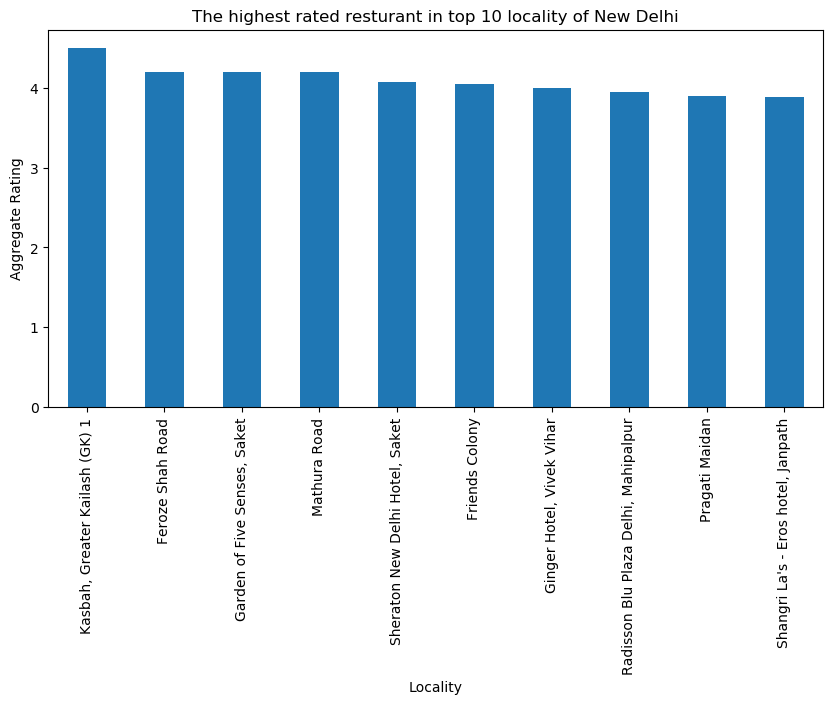

In [35]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The highest rated resturant in top 10 locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind = 'bar')
plt.show()

#### The top rated restarants are in Kesbah, Greater Kailash area.

## Let's see the locality with the lowest rating

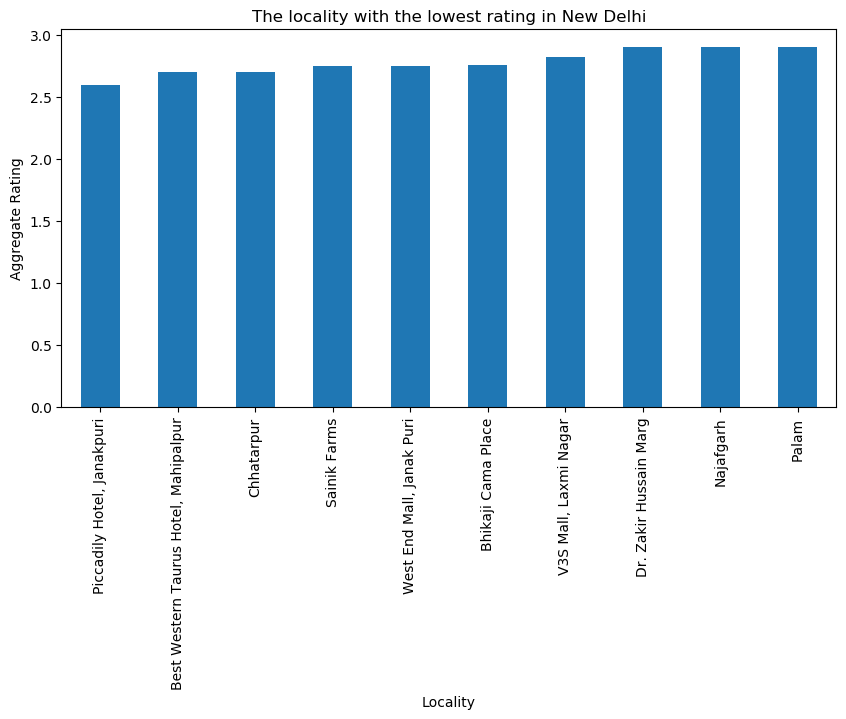

In [36]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The locality with the lowest rating in New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind = 'bar')
plt.show()

### The worst restarants are in Piccadily Hotel, Janakpuri.

## Let's see the highest number of restaurents in the locality of New Delhi

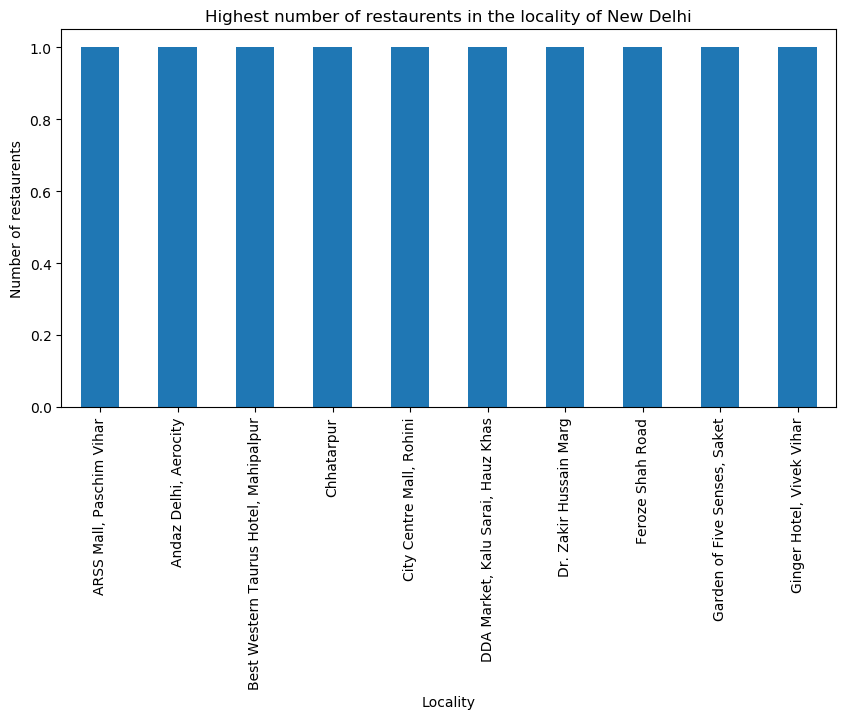

In [38]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('Highest number of restaurents in the locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of restaurents')
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind = 'bar')
plt.show()

## Which is the best places for chinese restaurant in New Delhi

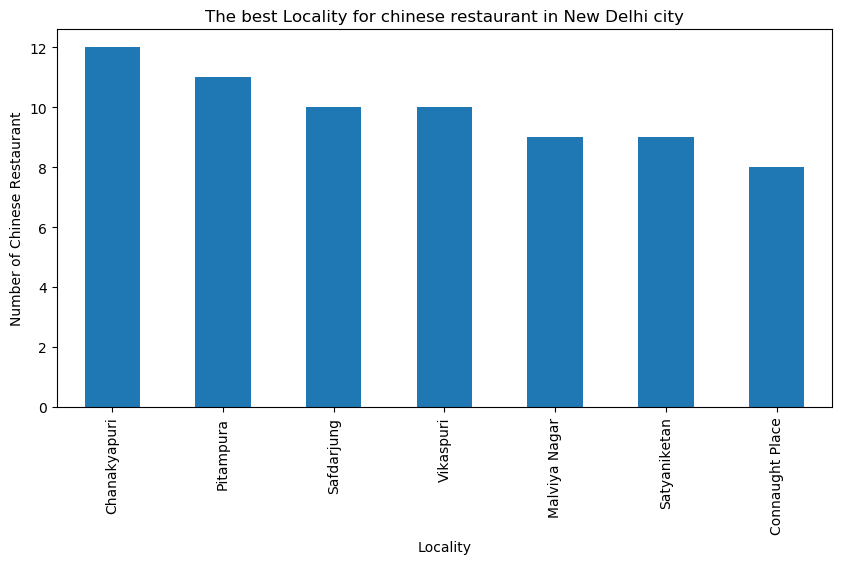

In [41]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The best Locality for chinese restaurant in New Delhi city')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of Chinese Restaurant') 

df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(7).plot(kind = 'bar')

plt.show()

### Chanakyapuri is the best place for Chinese restaurant.

## Let's see which chinese restaurent has a good rating

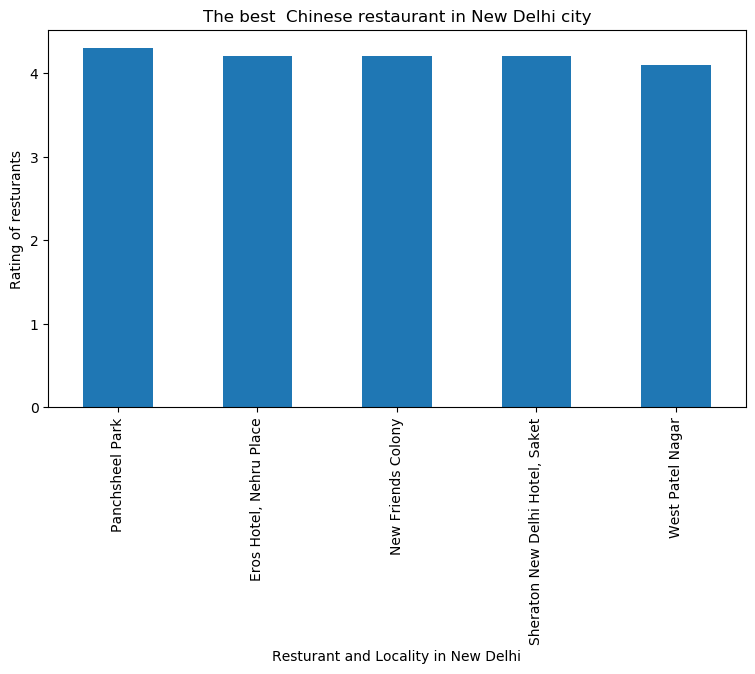

In [44]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The best  Chinese restaurant in New Delhi city')



df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant and Locality in New Delhi')

plt.ylabel('Rating of resturants')

plt.show()


### Panchsheel park is best Chinese resturants.

## Grouping the dat based on the Locality

In [45]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [48]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']

In [49]:
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [51]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [52]:
CLIENT_ID = 'K1LZA3U1MYZXQME3KWXDZMJ0GMPWLMKYJHTULRAPM4W5CI1L' # your Foursquare ID
CLIENT_SECRET = 'L1EL0ED3LXFTY5DQCJSJSBRGBEIFSUWPCYSSRQUACXQY3GIB' # your Foursquare Secret
VERSION = '20191207' # Foursquare API version

## Function to repeat the same process to all the Locality in New Delhi

In [79]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


### Find all the venues in New Delhi Locality

In [80]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [81]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1              Café Coffee Day       28.670009        77.102480   
2                    Pizza Hut       28.670321        77.103853   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Coffee Shop  
2         Pizza Place  
3   Indian Restaurant  
4  Chinese Restaurant

In [82]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   6                   6      6   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 17                  17     17   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          33                  33     33   
Yusuf Sarai                                    14                  14     14   
ibis New Delhi, Aerocity                       31                  31     31   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                6                6   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              17               17   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       33               33   
Yusuf Sarai                                 14               14   
ibis New Delhi, Aerocity                    31               31   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                6  
...                                        ...  
West Gate Mall, Rajouri Garden              17  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       33  
Yusuf Sarai                                 14  
ibis New Delhi, Aerocity                    31  

[238 rows x 6 columns]

In [85]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 211 uniques categories.


In [87]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 212 columns]

In [88]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.030303   
236                     Yusuf Sarai  0.071429           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Trail  \
0          0.000000              0.0          0.000000  ...    0.0   
1          0.000000              0.0          0.000000  ...    0.0   
2          0.000000              0.0          0.000000  ...    0.0   
3          0.142857              0.0          0.142857  ...    0.0   
4          0.000000              0.0          0.000000  ...    0.0   
..              ...              ...               ...  ...    ...   
233        0.000000              0.0          0.000000  ...    0.0   
234        0.000000              0.0          0.000000  ...    0.0   
235        0.000000              0.0          0.000000  ...    0.0   
236        0.000000              0.0          0.000000  ...    0.0   
237        0.000000              0.0          0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
233       0.000000                 0.0               0.0   
234       0.000000                 0.0               0.0   
235       0.030303                 0.0               0.0   
236       0.000000                 0.0               0.0   
237       0.032258                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                            0.0                    0.0         0.0   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236              

In [89]:
New_Delhi_grouped.shape

(238, 212)

In [90]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
               venue  freq
0  Indian Restaurant  0.22
1                ATM  0.11
2        Coffee Shop  0.11
3        Pizza Place  0.11
4     Sandwich Place  0.11


----Adchini----
               venue  freq
0               Café   0.4
1                Pub   0.2
2  Indian Restaurant   0.2
3              Hotel   0.2
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2          Multiplex   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2  Fast Food Restaurant  0.14
3           Coffee Shop  0.14
4   Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0     Indian Restaurant  0.33
1           Pizza Place  0.17
2                  Food  0.17
3  Fast Food Restaurant  0.17
4      Department Store  0.17


--

4       Dessert Shop  0.08


----Hauz Khas Village----
                 venue  freq
0                 Café  0.14
1    Indian Restaurant  0.12
2           Restaurant  0.08
3               Lounge  0.06
4  American Restaurant  0.04


----Holiday Inn, Aerocity----
               venue  freq
0              Hotel  0.32
1    Bed & Breakfast  0.06
2          Hotel Bar  0.06
3  Indian Restaurant  0.06
4         Shoe Store  0.03


----Holiday Inn, Mayur Vihar----
                 venue  freq
0                Hotel  0.29
1           Restaurant  0.12
2     Department Store  0.06
3  American Restaurant  0.06
4               Bakery  0.06


----Hotel Broadway, Daryaganj----
               venue  freq
0  Indian Restaurant  0.25
1   Asian Restaurant  0.12
2      Movie Theater  0.12
3             Hostel  0.12
4              Hotel  0.12


----Hotel City Park, Pitampura----
               venue  freq
0             Garden   0.2
1  Indian Restaurant   0.2
2               Park   0.2
3        Coffee Shop   0.

4                     Café   0.2


----Moti Nagar----
                     venue  freq
0      Fried Chicken Joint  0.33
1                BBQ Joint  0.33
2     Fast Food Restaurant  0.33
3                      ATM  0.00
4  North Indian Restaurant  0.00


----Mukherjee Nagar----
                 venue  freq
0  Indie Movie Theater  0.25
1       Ice Cream Shop  0.25
2                  Gym  0.25
3               Bakery  0.25
4                  ATM  0.00


----Munirka----
               venue  freq
0        Pizza Place  0.14
1   Department Store  0.14
2  Indian Restaurant  0.14
3      Grocery Store  0.14
4         Steakhouse  0.14


----Najafgarh----
                     venue  freq
0                      ATM  0.25
1        Electronics Store  0.25
2           Clothing Store  0.25
3        Food & Drink Shop  0.25
4  North Indian Restaurant  0.00


----Naraina----
               venue  freq
0        Pizza Place  0.25
1        Snack Place  0.25
2  Indian Restaurant  0.25
3               Café  0.

4    Chinese Restaurant  0.09


----Star City Mall, Mayur Vihar Phase 1----
                venue  freq
0               Hotel  0.29
1          Restaurant  0.12
2    Department Store  0.12
3              Bakery  0.06
4  Light Rail Station  0.06


----Subhash Nagar----
              venue  freq
0      Skating Rink  0.25
1              Park  0.25
2         Multiplex  0.25
3  Sculpture Garden  0.25
4               ATM  0.00


----Sunder Nagar----
                venue  freq
0   Indian Restaurant  0.23
1  Italian Restaurant  0.15
2               Hotel  0.15
3         Snack Place  0.08
4                Café  0.08


----T3 Domestic Arrival, Aerocity----
                  venue  freq
0           Coffee Shop  0.21
1          Dessert Shop  0.14
2           Pizza Place  0.07
3  Fast Food Restaurant  0.07
4             BBQ Joint  0.07


----TDI Mall, Rajouri Garden----
                  venue  freq
0  Fast Food Restaurant  0.16
1                  Café  0.16
2     Indian Restaurant  0.16
3         

In [91]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [92]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma     Indian Restaurant   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura     Indian Restaurant   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar     Indian Restaurant   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM                Market           Pizza Place   
1       Indian Restaurant                   Pub                 Hotel   
2             Pizza Place         Shopping Mall             Multiplex   
3     Rental Car Location        Airport Lounge           Coffee Shop   
4             Pizza Place      Department Store                  Food   
..                    ...                   ...                   ...   
233           Pizza Place                  Café           Snack Place   
234           Pizza Place   Sporting Goods Shop                 Hotel   
235     Indian Restaurant             Hotel Bar       Bed & Breakfast   
236           Coffee Shop      Asian Restaurant        Ice Cream Shop   
237     Indian Restaurant             Hotel Bar           Coffee Shop   

              5th Most Common Venue 6th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
1                     Women's Store   Fried Chicken Joint   
2                              Café                 Hotel   
3                  Airport Terminal  Fast Food Restaurant   
4              Fast Food Restaurant    Falafel Restaurant   
..                              ...                   ...   
233                      Hookah Bar                Garden   
234                   Metro Station    Falafel Restaurant   
235                Department Store  Gym / Fitness Center   
236             Japanese Restaurant                 Hotel   
237                   Shopping Mall      Department Store   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0          Sandwich Place    Chinese Restaurant            Food Truck   
1       French Restaurant            Food Truck            Food Court   
2       French Restaurant            Food Truck            Food Court   
3      Falafel Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
4      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
..                    ...                   ...                   ...   
233             Multiplex   American Restaurant  Gym / Fitness Center   
234   Fried Chicken Joint     French Restaurant            Food Truck   
235            Shoe Store         Shopping Mall                  Café   
236     Korean Restaurant                   Gym                  Park   
237             Gastropub       Bed & Breakfast                  Café   

    10th Most Common Venue  
0               Food Court  
1        Food & Drink Shop  
2        Food & Drink Shop  
3        French Restaurant  
4               Food Truck  
..                     ...  
233           Dessert Shop  
234             Food Court  
235              Gastropub  
236     Chinese Restaurant  
237          Metro Station  

[238 rows x 11 columns]

In [94]:

## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [96]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\sailesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               2   
2                   Average, Good          434               0   
3                         Average           59               4   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1                  Café     Indian Restaurant                   Pub   
2     Indian Restaurant           Pizza Place         Shopping Mall   
3                 Hotel   Rental Car Location        Airport Lounge   
4     Indian Restaurant           Pizza Place      Department Store   

  4th Most Common Venue           5th Most Common Venue 6th Most Common Venue  \
0           Pizza Place  Multicuisine Indian Restaurant           Coffee Shop   
1                 Hotel                   Women's Store   Fried Chicken Joint   
2             Multiplex                            Café                 Hotel   
3           Coffee Shop                Airport Terminal  Fast Food Restaurant   
4                  Food            Fast Food Restaurant    Falafel Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Sandwich Place    Chinese Restaurant            Food Truck   
1     French Restaurant            Food Truck            Food Court   
2     French Restaurant            Food Truck            Food Court   
3    Falafel Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
4    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

  10th Most Common Venue  
0             Food Court  
1      Food & Drink Shop  
2      Food & Drink Shop  
3      French Restaurant  
4             Food Truck

In [97]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters


### Cluster 1


In [98]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
0    28.668945    3.100000                   Average          117   
2    28.656131    3.275000             Average, Good          434   
4    28.690020    3.033333                   Average          126   
12   28.641698    3.050000                   Average           17   
13   28.690182    3.090000       Average, Good, Poor          971   
..         ...         ...                       ...          ...   
214  28.561105    3.425000             Average, Good          246   
221  28.560593    3.733333  Average, Good, Very Good          615   
222  28.628988    3.260000       Average, Good, Poor          239   
232  28.667344    3.077273       Average, Good, Poor          939   
234  28.630044    2.750000             Average, Poor          238   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                 0     Indian Restaurant                   ATM   
2                 0     Indian Restaurant           Pizza Place   
4                 0     Indian Restaurant           Pizza Place   
12                0     Indian Restaurant         Movie Theater   
13                0           Snack Place          Dessert Shop   
..              ...                   ...                   ...   
214               0     Indian Restaurant                 Hotel   
221               0                  Café  Fast Food Restaurant   
222               0     Indian Restaurant        Sandwich Place   
232               0             Juice Bar   Japanese Restaurant   
234               0     Indian Restaurant  Fast Food Restaurant   

    3rd Most Common Venue 4th Most Common Venue  \
0                  Market           Pizza Place   
2           Shopping Mall             Multiplex   
4        Department Store                  Food   
12                  Hotel                Hostel   
13             Smoke Shop             BBQ Joint   
..                    ...                   ...   
214                  Café           Pizza Place   
221         Shopping Mall                  Park   
222           Pizza Place           Coffee Shop   
232       Bed & Breakfast    Athletics & Sports   
234    Chinese Restaurant           Coffee Shop   

              5th Most Common Venue 6th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
2                              Café                 Hotel   
4              Fast Food Restaurant    Falafel Restaurant   
12                       Theme Park      Asian Restaurant   
13                           Market           Pizza Place   
..                              ...                   ...   
214                       Nightclub                Lounge   
221                   Metro Station                Market   
222              Chinese Restaurant    Light Rail Station   
232                   Women's Store     Fish & Chips Shop   
234                       BBQ Joint  Gym / Fitness Center   

      7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
0            Sandwich Place    Chinese Restaurant                 Food Truck   
2         French Restaurant            Food Truck                 Food Court   
4        Frozen Yogurt Shop   Fried Chicken Joint          French Restaurant   
12       Falafel Restaurant   Fried Chicken Joint          French Restaurant   
13        Indian Restaurant   Fried Chicken Joint          French Restaurant   
..                      ...                   ...                        ...   
214      Chinese Restaurant  Fast Food Restaurant  Middle Eastern Restaurant   
221             Music Venue     French Restaurant                 Food Truck   
222    Fast Food Restaurant    Falafel Restaurant        Fried Chicken Joint   
232  Furniture / Home Store    Frozen Yogurt Shop        Fried Chicken Joint   
234             Music Store        Sandwich Place                 Restaurant   

    10th Most Common Venue  
0               Food Court  
2        Foo

### cluster 2

In [102]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
5    28.700516    3.040000       Average, Good, Poor          594   
6    28.527088    3.117391       Average, Good, Poor         1012   
7    28.541298    3.425000  Average, Good, Very Good         2460   
8    28.555599    3.800000        Average, Very Good         2411   
11   28.562580    3.750000  Average, Good, Very Good          875   
..         ...         ...                       ...          ...   
225  28.524070    3.686364  Average, Good, Very Good         4001   
226  28.525054    3.322222             Average, Good         1940   
228  28.596073    3.052941             Average, Good          305   
231  28.637492    3.062264       Average, Good, Poor         1253   
236  28.648177    3.675000  Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5                 1  Gym / Fitness Center  Fast Food Restaurant   
6                 1                   Bar           Coffee Shop   
7                 1           Coffee Shop                  Café   
8                 1                  Café               Stadium   
11                1  Fast Food Restaurant         Shopping Mall   
..              ...                   ...                   ...   
225               1  Fast Food Restaurant           Pizza Place   
226               1                  Café  Fast Food Restaurant   
228               1                  Café                Bakery   
231               1  Fast Food Restaurant           Pizza Place   
236               1     Indian Restaurant           Pizza Place   

             3rd Most Common Venue   4th Most Common Venue  \
5                    Shopping Mall               Multiplex   
6                            Hotel       Food & Drink Shop   
7               Italian Restaurant        Asian Restaurant   
8                      Coffee Shop    Other Great Outdoors   
11             Japanese Restaurant             Karaoke Bar   
..                             ...                     ...   
225  Vegetarian / Vegan Restaurant            Dessert Shop   
226                 Sandwich Place      Chinese Restaurant   
228           Fast Food Restaurant  Furniture / Home Store   
231              Indian Restaurant          Ice Cream Shop   
236            Sporting Goods Shop                   Hotel   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5          Sandwich Place           Salad Place           Bus Station   
6      Chinese Restaurant                Market         Women's Store   
7    Fast Food Restaurant         Shopping Mall    Chinese Restaurant   
8           Metro Station           Golf Course           Music Venue   
11      Electronics Store         Women's Store    Frozen Yogurt Shop   
..                    ...                   ...                   ...   
225                   Bar                   Spa    Chinese Restaurant   
226                  Bank                   Spa                   Bar   
228    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
231           Event Space   Fried Chicken Joint     French Restaurant   
236         Metro Station    Falafel Restaurant   Fried Chicken Joint   

    8th Most Common Venue          9th Most Common Venue  \
5              Food Truck                    Pizza Place   
6    Fast Food Restaurant             Frozen Yogurt Shop   
7       Indian Restaurant                 Clothing Store   
8                   Hotel                   Dessert Shop   
11    Fried Chicken Joint              French Restaurant   
..                    ...                            ...   
225        Sandwich Place                  Women's Store   
226           Pizza Place  Vegetarian / Vegan Restaurant   
228            Food Truck                     Food Court   
231            Food Truck                     Food Court   
236     French Restaurant                     Food Truck   

    10th Most Common Venue  
5    

### cluster 3

In [103]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
9    28.659870    3.281481                        Average, Good         1309   
85   28.648885    3.561111             Average, Good, Very Good         7411   
179  28.572117    3.871429             Average, Good, Very Good         1871   
181  28.571849    3.316667                        Average, Good          472   
189  28.620715    3.880000             Average, Good, Very Good          626   
227  28.559704    3.278261             Average, Good, Very Good         1043   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                 2                  Café     Indian Restaurant   
9                 2                  Café          Dessert Shop   
85                2     Indian Restaurant           Flea Market   
179               2             Multiplex           Coffee Shop   
181               2  Fast Food Restaurant     Indian Restaurant   
189               2                 Hotel     Indian Restaurant   
227               2                  Café  Fast Food Restaurant   
229               2                  Café    Chinese Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1                     Pub                 Hotel         Women's Store   
9            Burger Joint         Burrito Place         Women's Store   
85                 Mosque         Women's Store  Fast Food Restaurant   
179     Convenience Store     Electronics Store                  Park   
181           Snack Place           Pizza Place         Deli / Bodega   
189            Restaurant    Italian Restaurant          Cocktail Bar   
227            Restaurant    Chinese Restaurant           Coffee Shop   
229                Bakery              Tea Room            Restaurant   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1       Fried Chicken Joint     French Restaurant            Food Truck   
9        Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
85   Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   
179        Asian Restaurant            Restaurant       Thai Restaurant   
181        Department Store    Frozen Yogurt Shop   Fried Chicken Joint   
189          History Museum                   Bar                   Spa   
227          Ice Cream Shop                   Pub      Department Store   
229    Fast Food Restaurant           Cheese Shop        Clothing Store   

    9th Most Common Venue     10th Most Common Venue  
1              Food Court          Food & Drink Shop  
9              Food Truck                 Food Court  
85      French Restaurant                 Food Truck  
179                  Café              Shopping Mall  
181     French Restaurant                 Food Truck  
189         Metro Station         Chinese Restaurant  
227     Food & Drink Shop  Middle Eastern Restaurant  
229           Coffee Shop                  Pet Store

### cluster 4

In [104]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
15   28.691136    3.390909             Average, Good, Very Good          485   
22   28.654105    3.085714                              Average           80   
57   28.699837    3.376471             Average, Good, Very Good         2460   
100  28.556869    4.500000                            Excellent          524   
102  28.600492    3.802326  Average, Excellent, Good, Very Good        28463   
103  28.652501    3.080000                  Average, Good, Poor         2196   
129  28.523047    2.925000                              Average           26   
131  28.705307    3.800000                                 Good          727   
135  28.579641    3.180000                        Average, Good          202   
160  28.712975    3.066667                              Average          121   
169  28.667261    3.200000                              Average           76   
180  28.534499    3.000000                  Average, Good, Poor          173   
218  28.552403    3.833333                      Good, Very Good         1133   
230  28.658041    3.400000                              Average           19   
233  28.695096    3.050000                              Average           86   

     Cluster Labels 1st Most Common Venue   2nd Most Common Venue  \
15                3  Gym / Fitness Center             Pizza Place   
22                3           Pizza Place    Fast Food Restaurant   
57                3           Pizza Place              Food Truck   
100               3     Indian Restaurant                    Café   
102               3                  Café             Coffee Shop   
103               3           Pizza Place       Convenience Store   
129               3       Thai Restaurant                     Bar   
131               3     Convenience Store              Food Truck   
135               3     Indian Restaurant        Asian Restaurant   
160               3           Pizza Place       Indian Restaurant   
169               3                 Hotel       Indian Restaurant   
180               3                  Café             Gaming Cafe   
218               3                   Bar  Furniture / Home Store   
230               3                  Café            Dessert Shop   
233               3                   NaN                     NaN   

       3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
15   South Indian Restaurant             BBQ Joint   Fast Food Restaurant   
22               Gaming Cafe    Frozen Yogurt Shop    Fried Chicken Joint   
57                 Juice Bar           Event Space     Frozen Yogurt Shop   
100       Italian Restaurant  Gym / Fitness Center  Performing Arts Venue   
102       Chinese Restaurant                   Bar      Indian Restaurant   
103        Fish & Chips Shop         Women's Store     Falafel Restaurant   
129            Historic Site     Indian Restaurant    Monument / Landmark   
131                     Lake    Light Rail Station          Women's Store   
135  South Indian Restaurant                  Café            Pizza Place   
160                  Airport             Multiplex     Falafel Restaurant   
169               Food Truck           Coffee Shop   Fast Food Restaurant   
180       Frozen Yogurt Shop   Fried Chicken Joint      French Restaurant   
218              Karaoke Bar    Athletics & Sports             Restaurant   
230             Burger Joint         Burrito Place          Women's Store   
233                      NaN                   NaN                    NaN   

    6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
15          Women's Store       Fried Chicken Joint     French Restaurant   
22      French Restaurant                Food Truck            Food Court   
57    Fried Chicken Joint         French Restaurant            Food Court   
100    Dim Sum Restaurant  Mediterranean Restaurant                Market   
102    

### cluster 5

In [105]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
59   28.654883    3.053846                        Average, Good          262   
68   28.554275    3.845833  Average, Excellent, Good, Very Good        32573   
69   28.550327    3.300000                              Average           30   
73   28.643036    3.000000                              Average            7   
82   28.548371    3.137500                  Average, Good, Poor          609   
110  28.635391    3.040385       Average, Good, Poor, Very Good         2442   
111  28.618772    3.666667             Average, Good, Very Good          725   
118  28.646549    3.200000                              Average           20   
127  28.619410    3.134615                  Average, Good, Poor         1648   
145  28.525674    3.300000                              Average           27   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 4                 Hotel   Rental Car Location   
10                4                 Hotel     Indian Restaurant   
19                4                 Hotel     Accessories Store   
35                4                 Hotel     Indian Restaurant   
56                4                 Hotel                  Café   
59                4                   NaN                   NaN   
68                4                  Café     Indian Restaurant   
69                4                 Hotel     Indian Restaurant   
73                4           Pizza Place     Indian Restaurant   
82                4                  Café     Indian Restaurant   
110               4     Indian Restaurant           Pizza Place   
111               4                 Hotel            Restaurant   
118               4     Indian Restaurant            Restaurant   
127               4                  Café           Wings Joint   
145               4     Electronics Store         Women's Store   
148               4  Fast Food Restaurant            Donut Shop   
161               4    Chinese Restaurant           Pizza Place   
162               4                  Café                 Hotel   
167               4  Gym / Fitness Center                  Food   
168               4                 Hotel       Thai Restaurant   
173               4                  Café      Department Store   
188               4                 Hotel     Convenienc


# Conclusion

- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
- Pancsheel park, Nehru place have the best Chinese Resturant.
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. 
#### Cluster 1: It is most recommended for Indian Restaurants.
#### Cluster 2: It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
#### Cluster 4: It is most recommended for the cafe and pizza.